## Exploratory Data Analysis: 

Before beginning data analysis, it was hypothesised that over time, customer bookings from online travel agencies increase along with the portion of cancellations from these bookings. I followed up with asking a number of questions to gain insight into other variables and factors that may contribute to feature selection.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import os

In [4]:
# Import data from the cleaning stage
hotels = pd.read_csv('data/hotels_clean.csv')

In [5]:
# Inspect categorical columns
hotels.describe(exclude=[np.number]).T

,count,unique,top,freq
hotel,119386,2,City Hotel,79326
arrival_date_month,119386,12,August,13875
meal,119386,5,BB,92306
country,119386,178,PRT,48587
market_segment,119386,7,Online TA,56476
distribution_channel,119386,5,TA/TO,97869
reserved_room_type,119386,10,A,85993
assigned_room_type,119386,12,A,74053
deposit_type,119386,3,No Deposit,104637
customer_type,119386,4,Transient,89612


In [5]:
# Inspect numerical columns
hotels.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,119386.0,59694.769914,34465.493318,0.0,29846.25,59695.50,89542.75,119389.0
is_canceled,119386.0,0.370412,0.482917,0.0,0.00,0.00,1.00,1.0
lead_time,119386.0,104.014474,106.863548,0.0,18.00,69.00,160.00,737.0
arrival_date_year,119386.0,2016.156585,0.707464,2015.0,2016.00,2016.00,2017.00,2017.0
arrival_date_week_number,119386.0,27.165170,13.605104,1.0,16.00,28.00,38.00,53.0
arrival_date_day_of_month,119386.0,15.798511,8.780825,1.0,8.00,16.00,23.00,31.0
stays_in_weekend_nights,119386.0,0.927605,0.998618,0.0,0.00,1.00,2.00,19.0
stays_in_week_nights,119386.0,2.500343,1.908298,0.0,1.00,2.00,3.00,50.0
adults,119386.0,1.856399,0.579256,0.0,2.00,2.00,2.00,55.0
children,119386.0,0.103890,0.398561,0.0,0.00,0.00,0.00,10.0


#### Initial findings of numeric columns:

 - About 25% of bookings from 2015 to 2017 were cancelled
 - 50% of bookings occurred between the 16th and 38th week of the year.
 - The median lead time is 69 with an IQR of 142
 - Guests typically do not spend any time on a waiting list, but the max was 391 days.
 - The average daily rate (ADR) was about 94.5 with a max of 5400.
 
#### Initial findings of categorical columns:

  - August is the most popular month between both hotels.
  - Most people who visit are from Portugal (the country where both hotels are located).
  - Most bookings are made with an online travel agent.
  - Most bookings are made with travel agent '9.0'.
  - Most people do not go through a company.

### What is the most common means of booking? Through which booking channel do most cancellations occur?

In [6]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [7]:
# Percent of canceled bookings by market segment
canceled_pct = round(100*hotels[hotels.is_canceled == 1].market_segment\
                                                        .value_counts(normalize = True, sort = False)\
                                                        .sort_index(), 1)
# Percent of bookings from each market segment
market_segment_pct = round(100*hotels.market_segment\
                                     .value_counts(normalize = True, sort = False)\
                                     .sort_index(), 1)

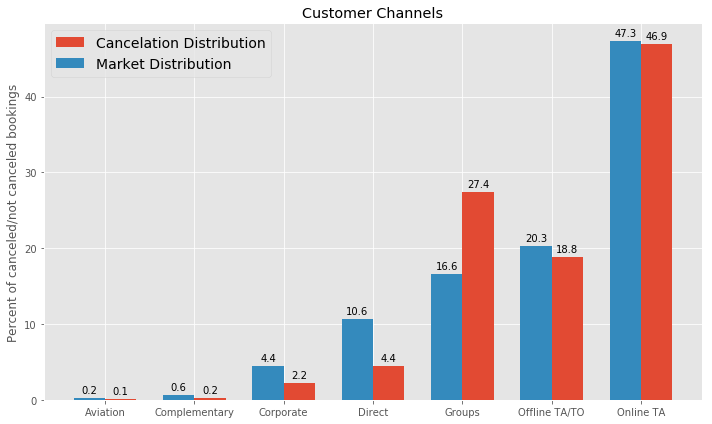

In [8]:
# set axis labels for market_segment options
labels = list(canceled_pct.index)
x = np.arange(len(labels))
width = 0.35

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6)) 
ms_canceled = ax.bar(x + width/2, canceled_pct, width, label = 'Cancelation Distribution')
ms_not_canceled = ax.bar(x - width/2, market_segment_pct, width, label = 'Market Distribution')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent of canceled/not canceled bookings')
ax.set_title('Customer Channels')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize = 14)

# Label bar height with autolabel
autolabel(ms_canceled)
autolabel(ms_not_canceled)

fig.tight_layout()

plt.show()

> The most common means of booking is through an online TA, with over 47% of customers going through this channel. Online TA's do account for almost half of cancellations over the three year period the data accounts for. Group bookings also stand out for booking cancellations, with only 17% of bookings originating from groups while accounting for almost 30% of overall cancellations. Direct bookings stand out for their relatively low cancellation rate. They contribute only 4.4% of cancellations, this being about a 15% cancellation rate among direct bookings. This compares starkly to online TA bookings, where 37% of those bookings are canceled. 

In [9]:
# Isolate data by year, eliminating Aviation for continuity between years (Aviation wasn't offered until 2016)
hotels_2015 = hotels[(hotels.arrival_date_year  == 2015) & (hotels.market_segment != 'Aviation')]
hotels_2016 = hotels[(hotels.arrival_date_year  == 2016) & (hotels.market_segment != 'Aviation')]
hotels_2017 = hotels[(hotels.arrival_date_year  == 2017) & (hotels.market_segment != 'Aviation')]

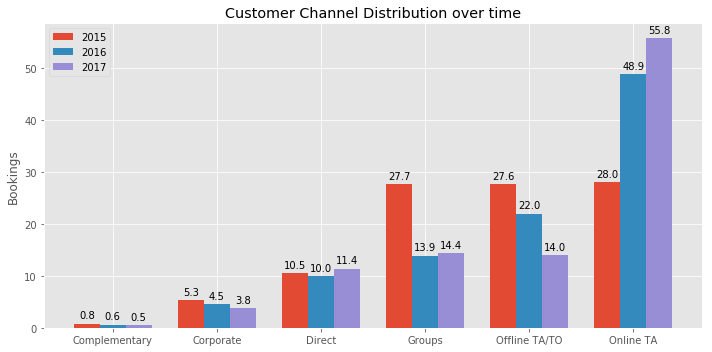

In [10]:
# Market segment breakdown by year
ms_2015 = round(100*hotels_2015.market_segment.value_counts(normalize = True, sort=False).sort_index(), 1)
ms_2016 = round(100*hotels_2016.market_segment.value_counts(normalize = True, sort=False).sort_index(), 1)
ms_2017 = round(100*hotels_2017.market_segment.value_counts(normalize = True, sort=False).sort_index(), 1)

# plot hist per week for arrival_date_week_number
labels = list(ms_2015.index)
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 5))
year_2015 = ax.bar(x - width, ms_2015, width, label='2015')
year_2016 = ax.bar(x, ms_2016, width, label='2016')
year_2017 = ax.bar(x + width, ms_2017, width, label='2017')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Bookings')
ax.set_title('Customer Channel Distribution over time')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Label bar height with autolabel
autolabel(year_2015)
autolabel(year_2016)
autolabel(year_2017)

fig.tight_layout()

plt.show()

> In the 2015 group, offline and online TA's made up a majority of bookings, with a little over a quarter of bookings distributed to each in that year. By 2016, almost half of bookings occured online, with a little over a third contributed by groups and offline TA's. By 2017, online TA's gained a clear advantage over the travel industry between these hotels, making up about 56% of bookings. Direct, corporate and complimentary bookings saw little to no change over the same time period.

In [11]:
# Cancellations by year based on market segment
canceled = hotels[(hotels.market_segment != 'Aviation')
                          & (hotels.is_canceled == 1)]
canceled_2015 = round(100*canceled[(canceled.arrival_date_year  == 2015)]\
                                .market_segment\
                                .value_counts(normalize = True, sort=False)\
                                .sort_index(), 1)

canceled_2016 = round(100*canceled[(canceled.arrival_date_year  == 2016)]\
                                .market_segment\
                                .value_counts(normalize = True, sort=False)\
                                .sort_index(), 1)

canceled_2017 = round(100*canceled[(canceled.arrival_date_year  == 2017)]\
                                .market_segment\
                                .value_counts(normalize = True, sort=False)\
                                .sort_index(), 1)

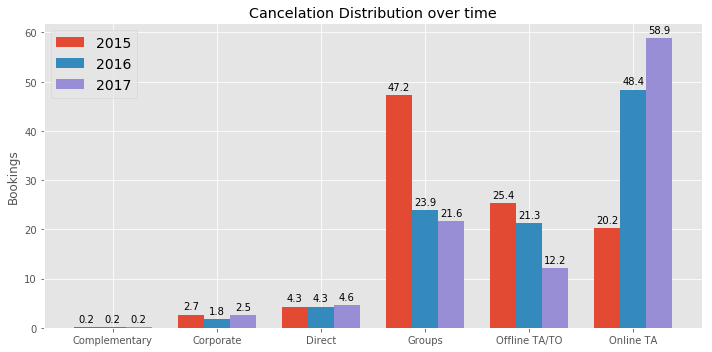

In [12]:
# plot hist per week for arrival_date_week_number
labels = list(canceled_2015.index)
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 5))
year_2015 = ax.bar(x - width, canceled_2015, width, label='2015')
year_2016 = ax.bar(x, canceled_2016, width, label='2016')
year_2017 = ax.bar(x + width, canceled_2017, width, label='2017')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Bookings')
ax.set_title('Cancelation Distribution over time')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=14)

# Label bar height with autolabel
autolabel(year_2015)
autolabel(year_2016)
autolabel(year_2017)


fig.tight_layout()

plt.show()

> Groups were the major contributors to cancellations in 2015, with 47% of cancellations originating from this channel. However there was a clear drop in group cancellations from 2015 to 2016, with a sharp increase from online TA's in the same time period. By 2017, more than half of cancellations took place online. 

#### In 2015…

  - 28% of bookings were through an online travel agency and 27% of those were cancelled.
  - 37% of all bookings were cancelled.
  - 20% of cancellations were from online travel agency bookings. 

#### In 2016…

  - 49% of bookings were through an online travel agency and 36% of those were cancelled.
  - 36% of all bookings were cancelled.
  - 48% of cancellations were from online travel agency bookings.

#### In 2017…

  - 56% of bookings were through an online travel agency and 41% of those were cancelled.
  - 39% of all bookings were cancelled.
  - 59% of cancellations were from online travel agency bookings.

Bookings from online travel agencies increased from 28% to 56% from 2015 to 2017. During that time, cancellations increased from 37% to 39%, with cancellations from OTA's increasing from 27% to 41%.

In [14]:
# list of data by year
data = [hotels_2015, hotels_2016, hotels_2017]
loc = ['City Hotel', 'Resort Hotel']
pct = []

# bookings by hotel for each year
for hotel in data:
    ms = hotel.groupby(['hotel', 'market_segment']).agg({'market_segment': 'count'})
    ms_pct = ms.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
    for place in loc:
        pct.append(round(ms_pct.loc[place].loc['Online TA'].values[0], 1))

In [15]:
pct

[22.4, 37.3, 51.8, 42.8, 58.3, 50.6]

Percentage of bookings from OTAs for city hotel:
  - 22.4% in 2015.
  - 51.8% in 2016.
  - 58.3% in 2017.

Percentage of bookings from OTAs for resort hotel: 
  - 37.3% in 2015.
  - 42.8% in 2016.
  - 50.6% in 2017.
  
In 2015, the city hotel received 22% of it's bookings through OTAs while the resort hotel received 37%. By 2017, city hotel recieved 58% of its bookings through an online TA with the resort hotel increasing their portion to 51%. It is clear that both increased significantly over time with the city hotel taking a major leap from 2015 to 2016, increasing from 22% to 52%.

### Does lead time correlate to cancellations?

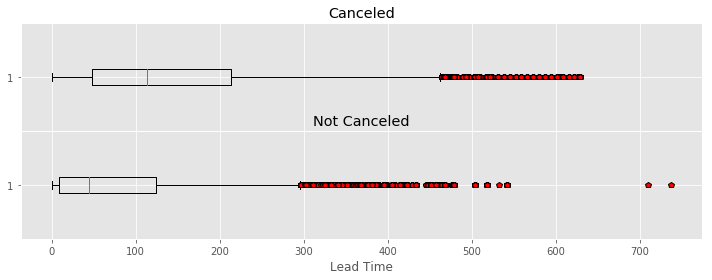

In [16]:
# canceled and not canceled bookings
canceled = hotels[hotels.is_canceled == True]
not_canceled = hotels[hotels.is_canceled == False]

# outlier labels
red_point = dict(markerfacecolor='r', marker='p')

# boxplot of lead time for canceled and not canceled bookings
fig, ax = plt.subplots(2, figsize=(10, 4), sharex=True, sharey=True, gridspec_kw={'hspace': 0})
ax[0].boxplot(canceled.lead_time, vert=False, flierprops=red_point)
ax[1].boxplot(not_canceled.lead_time, vert=False, flierprops=red_point)

ax[0].set_title('Canceled')
ax[1].set_title('Not Canceled')
ax[1].set(xlabel='Lead Time')
fig.tight_layout()
plt.show()

In [17]:
# median lead time for canceled and not canceled bookings
median_lead_canc = np.median(canceled.lead_time)
median_lead_not_canc = np.median(not_canceled.lead_time)

In [18]:
median_lead_canc, median_lead_not_canc

(113.0, 45.0)

  - The median lead time for canceled bookings is 113 days.
  - The median lead time for not canceled bookings is 45 days.

The average lead time for canceled bookings is 2.5 times greater on average than for those who did not cancel. It may be that people booking far out are looking for better deals, or other options opening up may be more likely given a larger lead time.

### Do people who book through online travel agencies have larger median lead times?

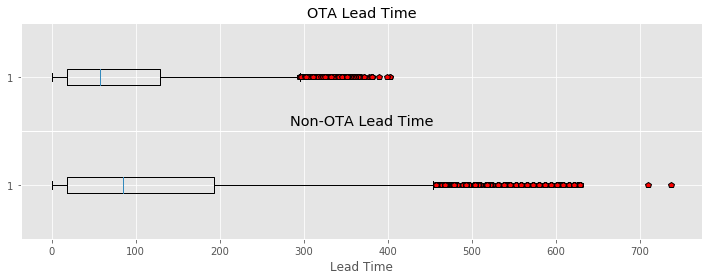

In [20]:
# define lead time for ota's and non-ota
ta_lead_time = hotels[hotels.market_segment == 'Online TA']['lead_time']
not_ta_lead_time = hotels[hotels.market_segment != 'Online TA']['lead_time']

# plot boxplot of lead time for canceled and non-canceled guests
fig, ax = plt.subplots(2, figsize=(10, 4), sharex=True, sharey=True, gridspec_kw={'hspace': 0})
ax[0].boxplot(ta_lead_time, vert=False, flierprops=red_point)
ax[1].boxplot(not_ta_lead_time, vert=False, flierprops=red_point)

ax[0].set_title('OTA Lead Time')
ax[1].set_title("Non-OTA Lead Time")
ax[1].set(xlabel = 'Lead Time')
fig.tight_layout()
plt.show()

In [23]:
median_lead_ota = np.median(hotels[hotels.market_segment == 'Online TA']['lead_time'])
median_lead_not_ota = np.median(hotels[hotels.market_segment != 'Online TA']['lead_time'])

In [24]:
median_lead_ota, median_lead_not_ota

(58.0, 85.0)

  - The median lead time for OTA bookings was 58 days
  - The median lead time for all other methods of booking was 85 days

Online travel agencies do not have a higher lead time on average, there may be another area here to explore. Lead time and bookings from OTA's seem to correlate to higher rates of cancellation.

### What trends are there in the distribution of company and travel agent bookings?

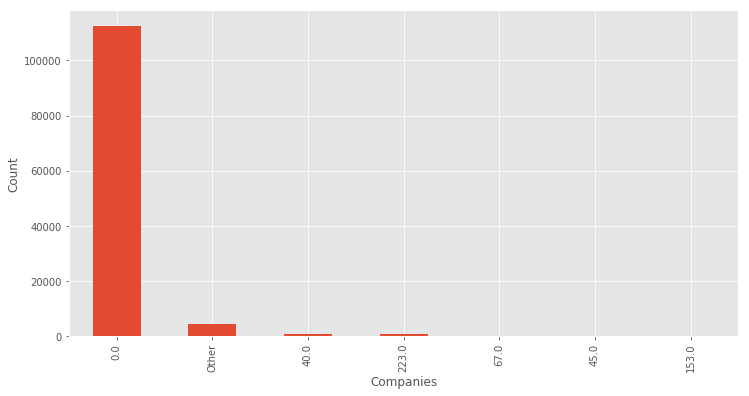

In [25]:
fig, ax = plt.subplots(figsize=(12, 6))
# top 6 companies
top_n = hotels.company.value_counts().index[:6]
# assign any company falling outside of the top 6 to "other"
(hotels.assign(company=hotels.company.where(hotels.company.isin(top_n), "Other" ))
.company.value_counts().plot.bar(ax=ax))
ax.set_xlabel('Companies')
ax.set_ylabel('Count')
plt.show()

> There are over 300 different companies but a vast majority of visitors do not go through them for booking. The '0' company represents guests who did not go through a company. 

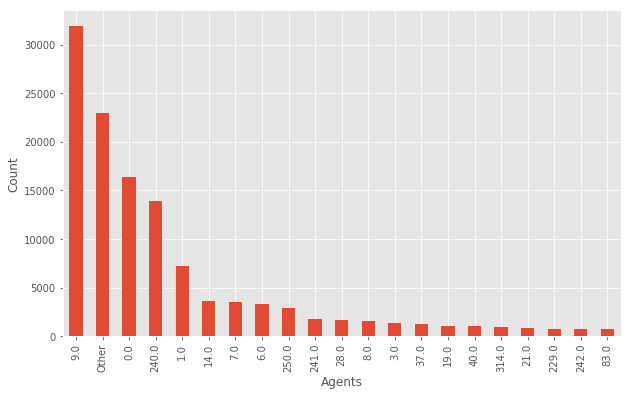

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
# top 20 agents
top_n = hotels.agent.value_counts().index[:20]
# assign agents outside of top 20 to 'other'
(hotels.assign(agent=hotels.agent.where(hotels.agent.isin(top_n), "Other" ))
.agent.value_counts().plot.bar(ax=ax))
ax.set_xlabel('Agents')
ax.set_ylabel('Count')
plt.show()

> The story seems to be different for travel agents, a majority use this channel with most going through agent '9.0'.

### How are cancellations distributed throughout the year?

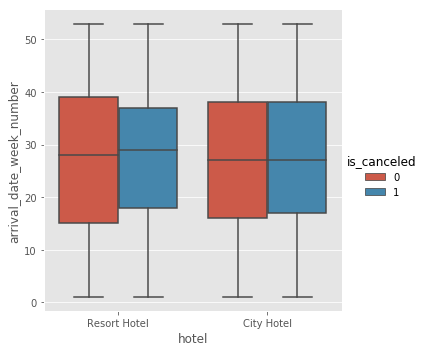

In [27]:
# mask for accessing data in plot function
mask = hotels.hotel.isin(['City Hotel', 'Resort Hotel'])
g = sns.catplot(x="hotel",\
                y="arrival_date_week_number", 
                data=hotels[mask], 
                kind="box", 
                hue = "is_canceled")
plt.show()

> Resort Hotel shows a higher concentration of cancelations during the summer months, while the City Hotel shows a closely matching correlation between bookings and canceled bookings, both uniformly distributed throughout the year.

### Are guests with kids more likely to cancel? 

In [29]:
# Calculate number of guests with babies who canceled and who did not cancel
babies = hotels.loc[(hotels.babies != 0)]['babies'].count()
not_canceled_babies = hotels.loc[(hotels.is_canceled == 0) & (hotels.babies != 0)]['babies'].count()

# Do the same calculation for families with children and with no children
children = hotels.loc[(hotels.children != 0)]['children'].count()
not_canceled_children = hotels.loc[(hotels.is_canceled == 0) & (hotels.children != 0)]['children'].count()

# No children
conditions = (hotels.children == 0) & (hotels.babies == 0)
no_kids = hotels.loc[conditions]['adults'].count()
not_canceled_no_kids = hotels.loc[(hotels.is_canceled == 0) & (conditions)]['adults'].count()

In [30]:
# percentage of families who did not cancel
perc_babies = str(round(not_canceled_babies/babies, 2)*100) + '%'
perc_children = str(round(not_canceled_children/children, 2)*100) + '%'
perc_no_kids = str(round(not_canceled_no_kids/no_kids, 2)*100) + '%'

In [31]:
# set data frame with results if kids breakdown

d1 = {'guest_type': ['babies', 'children', 'without_children'], \
     'not_cancled': [not_canceled_babies, not_canceled_children, not_canceled_no_kids],\
    'percent': [perc_babies, perc_children, perc_no_kids]}

d = {'guest_type': ['Babies', 'Children', 'No kids'], \
    'percent': [perc_babies, perc_children, perc_no_kids]}

pie_data = pd.DataFrame(data=d)

In [32]:
import re

def donut_plot(data, plotnumber):
    ''' Create donut plot with data and plot number for multiple plots'''
    startingRadius = 0.7 + (0.3* (len(data)-1))
    for index, row in data.iterrows():
        scenario = row["guest_type"]
        percentage = row["percent"]
        textLabel = scenario
        
        percentage = int(re.search(r'\d+', percentage).group())
        remainingPie = 100 - percentage
        
        donut_sizes = [remainingPie, percentage]
        
        plt.text(0.01, startingRadius - 0.25, textLabel, ha='right', va='bottom', fontsize = 12, 
        fontweight = 'bold')
        
        plt.pie(donut_sizes, radius=startingRadius, startangle=0, colors=['lightgray', 'tomato'],
                wedgeprops={"edgecolor": "white", 'linewidth': 1.5})
        
        startingRadius-=0.3

    # equal ensures pie chart is drawn as a circle (equal aspect ratio)
    plt.axis('equal')

    # create circle and place onto pie chart
    circle = plt.Circle(xy=(0, 0), radius=0.35, facecolor='white')
    plt.gca().add_artist(circle)
    plt.show()

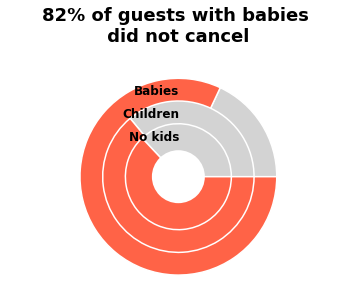

In [33]:
# plot the proportion of cancellations based on whether guests had babies, children or none.
plt.title('82% of guests with babies \n did not cancel \n', fontsize = '18', fontweight = 'bold')
donut_plot(pie_data, '1')

> Guests with babies followed through with their booking 83% of the time and 86% of guests who stayed with babies had at least one special request. 

### How do the hotel stays of guests with/without children vary throughout the year? Is this different between hotels?

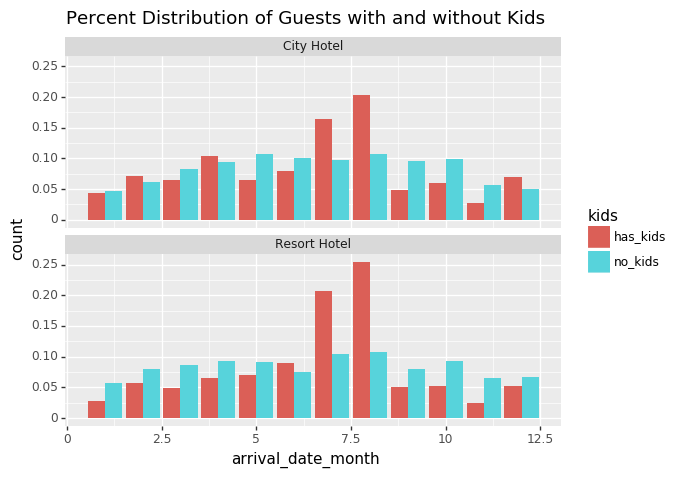

<ggplot: (8774724149049)>

In [35]:
# Map months of the year to numeric values to create arrival date column for exploration
d = {'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12, 'January':1, 'February':2, 'March':3, 'April':4, 'May': 5, 'June':6}
hotels.arrival_date_month = hotels.arrival_date_month.map(d)

#Recreated plot from tidy tuesday 

df = (
      hotels
          .groupby(['hotel', 'arrival_date_month', 'kids'])
          .size()
          .groupby(level=[0,2])
          .apply(lambda x: x/x.sum())
          .reset_index()
      )

df.rename(columns = {0:'count'}, inplace=True)

from plotnine import *

ggplot(df, aes(x = 'arrival_date_month', y = 'count', fill = 'kids')) + \
    geom_col(position='dodge') + facet_wrap(['hotel'], nrow = 2) + \
    ggtitle("Percent Distribution of Guests with and without Kids")

> Between both hotels, a majority of guests come without babies or children. Out of the year however, it is easy to predict when families will arrive, between both hotels families typically arrived in the summer months. This could be an opportunity to explore for each hotel.

### How does the average daily rate change with family size?

In [36]:
kids_condition = (hotels['children'] !=0) | (hotels['babies'] != 0)
kids_per_guest = hotels[['hotel','adr','adults', 'babies', 'children']]
kids_per_guest['kids'] = kids_per_guest['babies'] + kids_per_guest['children']

# Filter out guests with more than 3 kids to eliminate outliers.
kids_per_guest = kids_per_guest[kids_per_guest['kids'] <= 3]

/Users/mattmerrill/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


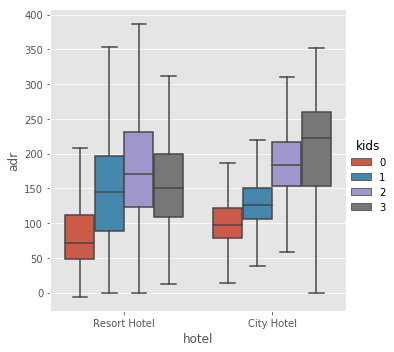

In [37]:
# plot average daily rate based on number of kids (babies and children combined) without adr outliers
g = sns.catplot(x="hotel",
y="adr", data=kids_per_guest, kind="box", hue = "kids", showfliers = False)
plt.show()

> The average revenue increases on average as family size increases for both hotels.

## Summary of Observations

After exploring the data, it is clear that my hypothesis has been confirmed. The use of online travel agencies and cancelations increased, reaching a peak in the last year of the data with 56% of guests booking through an OTA and 41% of all guests canceling (up from 28% and 20%, respectively). However, there were some surprising insights gained as well.

- Customers who cancel typically have a longer lead time. Although most cancellations come from customers who book through an OTA, their average lead time is shorter than for other means of booking. This means lead time may be another likely factor in determining cancellations.
- Guests who booked with at least one baby were more likely to follow through with the booking and were more likely to require accommodations.
- The average daily rate increases with each added child to the itinerary.
- Guests with kids represent a small portion of guests for both hotels, suggesting an untapped market.

In conclusion, customers who book through an online travel agency, and those who book with a larger lead time are more likely to cancel. It seems that the trends in customer preference for online booking are directly correlated with an increase in cancellations. This leads me to believe that the market is seeking the flexibility and freedoms that come from risk free booking with OTAs.
There are however a number of areas to continue exploring and confirm through statistical analysis. How confident can I be in this conclusion? The sample size for families is quite small, could their low rate of cancellation be due to the small sample size? How confident can I be in identifying lead time as a major factor in deciding cancellations?